In [194]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import copy
import numpy as np

In [253]:
totals = []
allCountries = []

for year in range(2014,2023):
    for month in range(1,13):
        name ="%s:%s" % (year, month)
        fileName = "Data/referrer-monthly-countries/%s/%s-%s.csv" % (year, year, month)
        try:
            with open(fileName) as file:
                i = 0
                xIndex = (year-2014)*12 + month-1
                for line in file.readlines():
                    if i == 0:
                        i = 1
                        continue

                    line = line.strip().split(',')
                    val = int(line[3])
                    if line[2] in allCountries:
                        totals[allCountries.index(line[2])] += val
                    else:
                        allCountries.append(line[2])
                        totals.append(val)
        except FileNotFoundError:
            continue

countries = allCountries

In [254]:
temp = copy.deepcopy(totals)
temp.sort(reverse=True)
temp = temp[:10]
countries = []

for v in temp:
    countries.append(allCountries[totals.index(v)])

In [255]:
maxValues = [1 for j in range(0,9*12)]
sumValues = [1 for j in range(0,9*12)]
occurences = []
xData = []
countryLabels = []
months = [
    'jan',
    'feb',
    'mar',
    'apr',
    'may',
    'jun',
    'jul',
    'aug',
    'sep',
    'oct',
    'nov',
    'dec'
]

for year in range(2014,2023):
    for month in range(1,13):
        name ="%s-%s" % (year, months[month-1])
        xData.append(name)
        fileName = "Data/referrer-monthly-countries/%s/%s-%s.csv" % (year, year, month)
        try:
            with open(fileName) as file:
                i = 0
                xIndex = (year-2014)*12 + month-1
                for line in file.readlines():
                    line = line.strip().split(',')

                    if i == 0 or line[2] not in countries:
                        i = 1
                        continue
                    
                    if line[2] not in countryLabels:
                        countryLabels.append(line[2])
                        occurences.append([0 for j in range(0,9*12)])
                    
                    val = int(line[3])
                    yIndex = countryLabels.index(line[2])
                    occurences[yIndex][xIndex] = val
                    sumValues[xIndex] += val
                    if val > maxValues[xIndex]:
                        maxValues[xIndex] = val
        except FileNotFoundError:
            continue

In [243]:
# Normalization step
for index, o in enumerate(occurences):
    for k, v in enumerate(o):
        o[k] = v/sumValues[k]

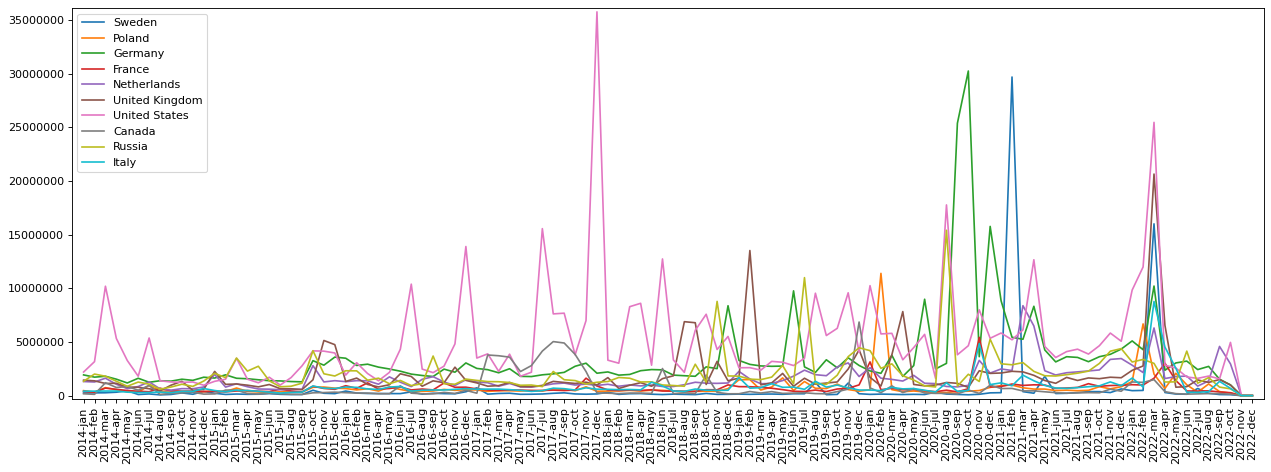

In [256]:
npOc = np.asarray(occurences)

figure(figsize=(16, 6), dpi=80, layout='tight')
plt.margins(0.01)
plt.xticks(ticks=[j for j in range(0,108)], labels=xData, rotation=90)
lineObjects = plt.plot(npOc.T)
plt.ticklabel_format(axis='y', style='plain')
plt.legend(lineObjects, countryLabels)